<a href="https://colab.research.google.com/github/GarimaChopra/AML/blob/main/Project5_letter_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The Letter Recognition dataset** contains 20,000 samples, where each sample is a vector of 16 geometric/statistical features about a letter. The goal of this assignment is to recognize letters using voting and ensemble classifiers.

In [1]:
# Using Pandas for importing data from file 
import pandas as pd

# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns

# Using numpy for to operate on multidimentional arrays.
import numpy as np

In [2]:
# Read raw file from github into a dataframe

df= pd.read_csv('https://raw.githubusercontent.com/bforoura/AML/master/letters.csv')

#verify if data is loaded
df.shape

(20000, 17)

In [3]:
# view dataset
df.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,class
0,2,4,4,3,2,7,8,2,9,11,7,7,1,8,5,6,Z
1,4,7,5,5,5,5,9,6,4,8,7,9,2,9,7,10,P
2,7,10,8,7,4,8,8,5,10,11,2,8,2,5,5,10,S
3,4,9,5,7,4,7,7,13,1,7,6,8,3,8,0,8,H
4,6,7,8,5,4,7,6,3,7,10,7,9,3,8,3,7,H


In [4]:
#summarize the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x-box   20000 non-null  int64 
 1   y-box   20000 non-null  int64 
 2   width   20000 non-null  int64 
 3   high    20000 non-null  int64 
 4   onpix   20000 non-null  int64 
 5   x-bar   20000 non-null  int64 
 6   y-bar   20000 non-null  int64 
 7   x2bar   20000 non-null  int64 
 8   y2bar   20000 non-null  int64 
 9   xybar   20000 non-null  int64 
 10  x2ybr   20000 non-null  int64 
 11  xy2br   20000 non-null  int64 
 12  x-ege   20000 non-null  int64 
 13  xegvy   20000 non-null  int64 
 14  y-ege   20000 non-null  int64 
 15  yegvx   20000 non-null  int64 
 16  class   20000 non-null  object
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


**1) Problem Statement:** 
Prepare the training dataset for classification by performing transformations such as encoding, imputing, etc., as needed.

In [5]:
# Check to see if there are any missing values
df.isnull().sum()

x-box    0
y-box    0
width    0
high     0
onpix    0
x-bar    0
y-bar    0
x2bar    0
y2bar    0
xybar    0
x2ybr    0
xy2br    0
x-ege    0
xegvy    0
y-ege    0
yegvx    0
class    0
dtype: int64

As none of the columns contain null values  we dont need an imputer

In [6]:
df.dtypes

x-box     int64
y-box     int64
width     int64
high      int64
onpix     int64
x-bar     int64
y-bar     int64
x2bar     int64
y2bar     int64
xybar     int64
x2ybr     int64
xy2br     int64
x-ege     int64
xegvy     int64
y-ege     int64
yegvx     int64
class    object
dtype: object

All columns except the target 'class' column are numeric. We need to encode the target class



In [7]:
# assigning values to X and Y

X= df.drop(['class'], axis=1) #features
Y = df['class'] #target

# import encoder
from sklearn.preprocessing import LabelEncoder
# encode Y
enc = LabelEncoder()
enc.fit(Y)
Y = pd.DataFrame(enc.transform(Y))

Y=Y[0] #converting Y to 1D 
print(X.shape,Y.shape)


(20000, 16) (20000,)


**2) Problem Statement:** Plot label frequencies to verify that the letters A-Z are well-represented in the dataset

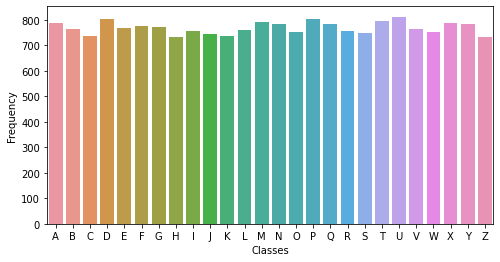

In [8]:
#Check whether the classes are balanced or not
plt.subplots(figsize=(8,4))
sns.barplot(x = df['class'].value_counts().sort_index(ascending=True).index , y = df['class'].value_counts().sort_index(ascending=True).values);
plt.xlabel('Classes');
plt.ylabel('Frequency');



All letters A-Z are well-represented in the dataset. U has maximum representation and Z has minimum representation. 

**3) Problem Statement**: Create a variety of classification models such as decision tree, random forest, extra trees, SVM, SGD, etc.

In [9]:
# import statement for models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

# create decision trees 
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)

# random forest and extra trees
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
etc = ExtraTreesClassifier(random_state=42)

# svc linear, poly, rbf
svc_linear = SVC(kernel='linear', random_state=42, probability=True)
svc_poly = SVC(kernel='poly', random_state=42, probability=True)
svc_rbf = SVC(kernel='rbf', random_state=42, probability=True)

#sgd
sgd = SGDClassifier(loss = 'log', random_state=42)

**4) Problem Statement:** Train each model separately and cross-validate using cross_validate_model():



In [10]:
# import k fold, cross_val_score
from sklearn.model_selection import KFold, cross_val_score

# method to train and cross validate

def cross_validate_model (classifier_model, X, y):
           kfold = KFold(n_splits=3, shuffle=True, random_state=10)
          # perform model cross validation on the shuffled folds
           results = cross_val_score(classifier_model, X, y, cv=kfold)
           # return the mean score for all folds
           return results.mean()

In [11]:
# cross validate the decision tree model
dt_entropy_score = cross_validate_model(dt_entropy , X, Y)
dt_gini_score = cross_validate_model(dt_gini , X, Y)

# cross validate the random forest and extra trees
rfc_score = cross_validate_model(rfc , X, Y)
etc_score = cross_validate_model(etc , X, Y)

# cross validate  svc linear, poly, rbf
svc_linear_score = cross_validate_model(svc_linear , X, Y)
svc_poly_score = cross_validate_model(svc_poly , X, Y)
svc_rbf_score = cross_validate_model(svc_rbf , X, Y)


# cross validate the SGD
sgd_score = cross_validate_model(sgd , X, Y)

print("Decision Tree Entropy Score:", dt_entropy_score)
print("Decision Tree Gini Score:", dt_gini_score)
print("Random Forest Classifier Score:", rfc_score)
print("Extra Tree Classifier Score:", etc_score)
print("SVC Linear Score:", svc_linear_score )
print("SVC Poly Score", svc_poly_score)
print("SVC RBF Score:", svc_rbf_score)
print("SGD Score:", sgd_score)

Decision Tree Entropy Score: 0.8712997743452161
Decision Tree Gini Score: 0.8656999193244658
Random Forest Classifier Score: 0.9585999547907393
Extra Tree Classifier Score: 0.9681999623391168
SVC Linear Score: 0.8503998367438363
SVC Poly Score 0.9425498647059847
SVC RBF Score: 0.9194501046024807
SGD Score: 0.5542023678894062


**5) Problem Statement:** Train the voting classifier model and cross-validate

In [12]:
 # voting ensemble made by above models

from sklearn.ensemble import VotingClassifier

 # hard voting classifier
hard_voting_clf = VotingClassifier(
    estimators=[('dt_entropy', dt_entropy), ('dt_gini', dt_gini), ('rfc', rfc), ('etc', etc), ('svc_linear', svc_linear), 
                ('svc_poly',svc_poly), ('svc_rbf', svc_rbf), ('sgd', sgd)],
    voting='hard')

In [13]:
hard_voting_score = cross_validate_model(hard_voting_clf, X, Y)
print("Voting Ensemble Score:", hard_voting_score)

Voting Ensemble Score: 0.9567499122793635


**6) Problem Statement:**  Plot the obtained accuracy scores in a bar chart. Has the voting classifier outperformed each individual model? Explain why or why not.

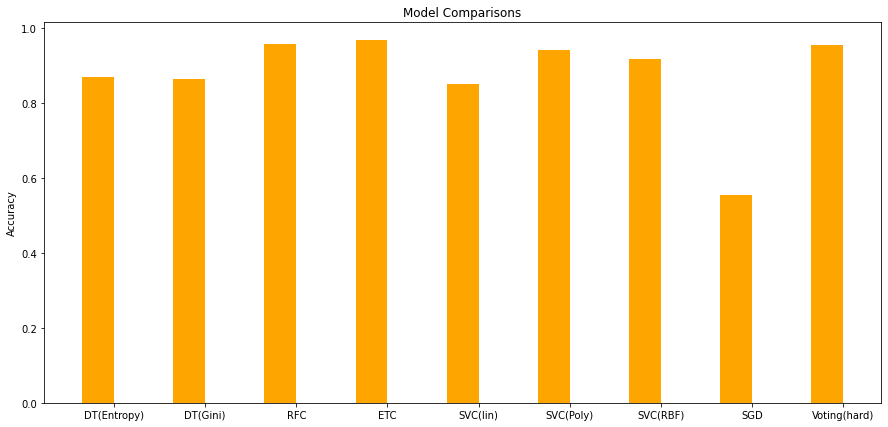

In [14]:
# Plotting all models

labels = ['DT(Entropy)', 'DT(Gini)', 'RFC', 'ETC', 'SVC(lin)', 'SVC(Poly)', 'SVC(RBF)', 'SGD', 'Voting(hard)']
training_scores = [dt_entropy_score, dt_gini_score, rfc_score, etc_score, svc_linear_score , svc_poly_score, svc_rbf_score, sgd_score, hard_voting_score]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,7))
rects1 = ax.bar(x - width/2, training_scores, width, color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(labels)


plt.title('Model Comparisons')
plt.show()


Voting Classifier performs better than most models but has not outperformed all models. Extra Tree Classifier(ETC) and Random Forest Classifier(RFC) perform better than Voting. 
The reason for this is that Voting Classifier predicts the class with highest probability estimate . Every individual classifier votes for a class, and the majority wins. This means some comprising models are not well calibrated

**7) Problem Statement:** Plot feature_importances discovered by the random forest model to get a plot . What do these values mean, and do all tree models agree on the importance of features?


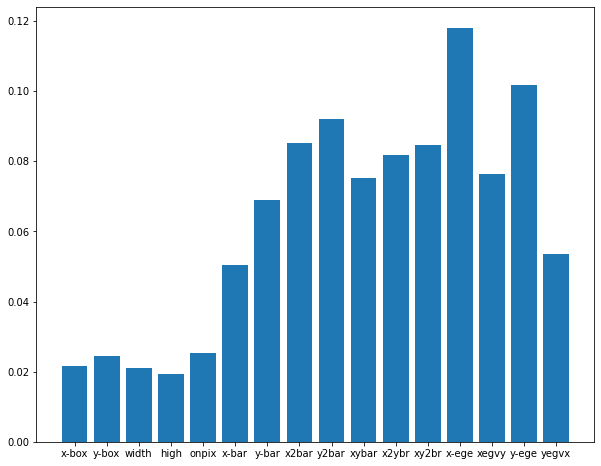

In [15]:
import matplotlib.pyplot as pyplot

# feature importances from the random forest model
rfc.fit(X,Y)
importance = rfc.feature_importances_

pyplot.figure(figsize=[10, 8])
# plot feature importances
pyplot.bar(X.columns, importance)

pyplot.show()

In [16]:
# summarize feature importances in descending order
feature_importances = pd.DataFrame(importance,
                                 index = X.columns,
                             columns=['importance']).sort_values('importance',  ascending=False)

print(feature_importances)

       importance
x-ege    0.118090
y-ege    0.101740
y2bar    0.092046
x2bar    0.085058
xy2br    0.084570
x2ybr    0.081643
xegvy    0.076381
xybar    0.075350
y-bar    0.068983
yegvx    0.053680
x-bar    0.050486
onpix    0.025402
y-box    0.024572
x-box    0.021588
width    0.020938
high     0.019474


The above plot show the features that random forest found most significant. These features were most useful in classifying objects to a particular class

In [17]:
# feature importances from the extra tree model
etc.fit(X, Y);
etc_importance = etc.feature_importances_

feature_importances_etc = pd.DataFrame(etc_importance,
                                 index = X.columns,
                             columns=['etc_importance']).sort_values('etc_importance',  ascending=False)

print(feature_importances_etc )

       etc_importance
x-ege        0.102771
y-ege        0.100109
x2bar        0.092207
y2bar        0.090283
xy2br        0.083920
x2ybr        0.080065
xybar        0.074504
xegvy        0.071026
y-bar        0.070065
yegvx        0.056084
x-bar        0.053977
onpix        0.029487
width        0.025877
y-box        0.024661
x-box        0.023618
high         0.021343


In [18]:
# get feature importances from the dt (entropy) model
dt_entropy.fit(X, Y);
dt_entropy_importance =dt_entropy.feature_importances_

feature_importances_dt_entropy = pd.DataFrame(dt_entropy_importance,
                                 index = X.columns,
                             columns=['dt_entropy_importance']).sort_values('dt_entropy_importance',  ascending=False)
print(feature_importances_dt_entropy )

       dt_entropy_importance
x-ege               0.175488
y-ege               0.158506
xy2br               0.106462
xegvy               0.090029
y2bar               0.082155
y-bar               0.077566
x2bar               0.075118
xybar               0.060705
yegvx               0.058899
x2ybr               0.058653
x-bar               0.019362
y-box               0.010114
high                0.008385
onpix               0.008256
x-box               0.006172
width               0.004130


In [19]:
# get feature importances from the dt (gini) model
dt_gini.fit(X, Y);
dt_gini_importance = dt_gini.feature_importances_

feature_importances_dt_gini_importance  = pd.DataFrame(dt_gini_importance ,
                                 index = X.columns,
                             columns=['dt_gini_importance ']).sort_values('dt_gini_importance ',  ascending=False)
print(feature_importances_dt_gini_importance )

       dt_gini_importance 
x-ege             0.139692
y-ege             0.114949
y2bar             0.108482
xegvy             0.097309
xy2br             0.085507
x2ybr             0.079881
xybar             0.074184
x2bar             0.069913
yegvx             0.058814
y-bar             0.053540
x-bar             0.048930
y-box             0.018293
onpix             0.017164
high              0.014442
x-box             0.010407
width             0.008494


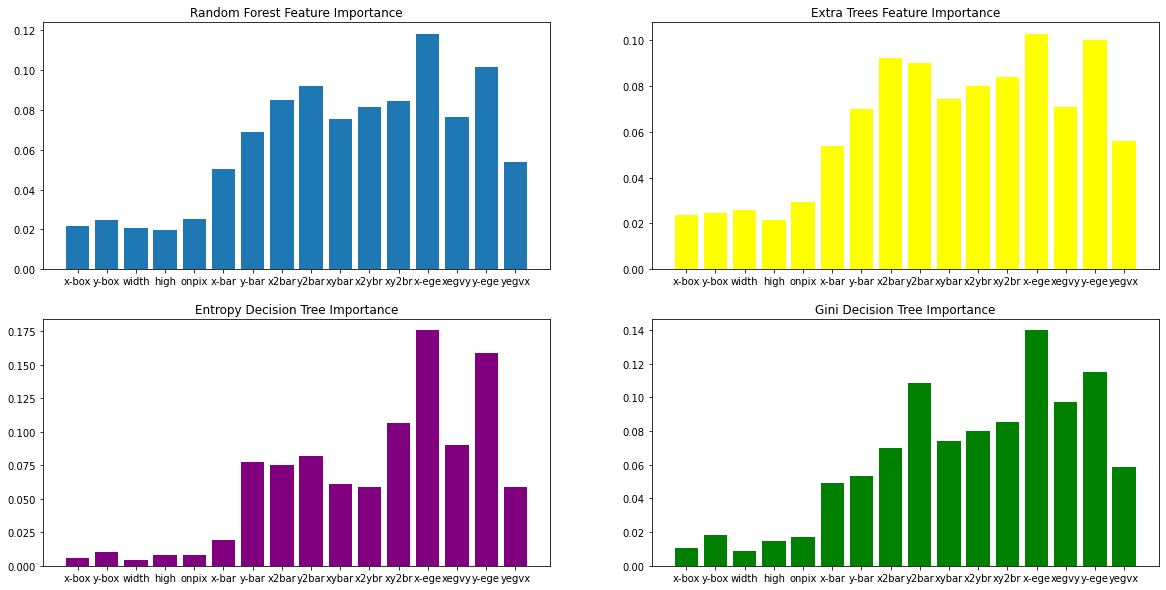

In [20]:
pyplot.figure(figsize=[20, 10])

# 1
pyplot.subplot(221).set_title("Random Forest Feature Importance")
pyplot.bar(X.columns, importance)

# 2
pyplot.subplot(222).set_title("Extra Trees Feature Importance")
pyplot.bar(X.columns, etc_importance, color="yellow")

# 3
pyplot.subplot(223).set_title("Entropy Decision Tree Importance")
pyplot.bar(X.columns, dt_entropy_importance, color="purple")

# 4
pyplot.subplot(224).set_title("Gini Decision Tree Importance")
pyplot.bar(X.columns, dt_gini_importance, color="green")


pyplot.show()

X-ege and Y-ege are the most important features for all models , but the rest of the feature preference differs between models

**8) Problem Statement :** Train K-Means on the dataset, and plot the Elbow and Silhouette inertia values . Explain the results.

In [21]:
# scaling data as K-means works better on scaled data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
K_mean_X =  pd.DataFrame(scaler.transform(X), columns=X.columns);

In [22]:
from sklearn.cluster import KMeans

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(K_mean_X)
                for k in range(1, 10)] 
inertias = [model.inertia_ for model in kmeans_per_k]
print(inertias)

[320000.0, 263293.2132298389, 236712.70386172074, 220558.48435369093, 206888.0920177124, 197113.57671910655, 188462.90349981343, 181394.19571411685, 173695.13875537802]


Inertia decreases as K increases as distance from centroid decreases

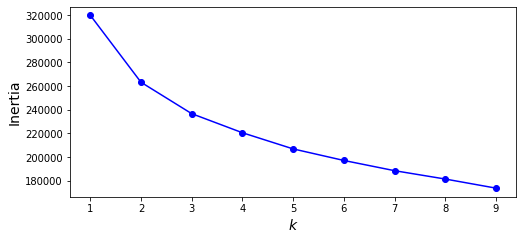

In [23]:
# plotting Elbow plot

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

The elbow plot indicates that the number of clusters should be 2 (k = 2). 
To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion

In [24]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(K_mean_X, model.labels_)
                     for model in kmeans_per_k[1:]]
print(silhouette_scores)

[0.1607405403054086, 0.15129455054232122, 0.12371580929299685, 0.1314835935746175, 0.13621583074326904, 0.1335761786961855, 0.13264819636112604, 0.13861298124689175]


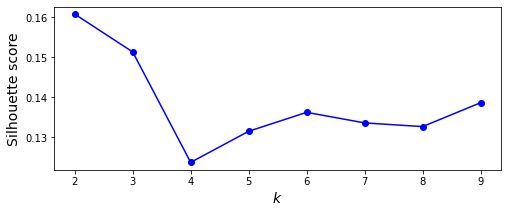

In [25]:

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

plt.show()

Silhouette score at K=2 seems to be dense and nicely separated (it is closest to 1). The score of near to 0 at k=4 means that clusters are overlapping, data belonging to clusters may be wrong/incorrect.

**9) Problem Statement:** Create a 3D plot of the target concept against the two most influential features from Step 7. How does the visualized data match the results obtained in Step 7

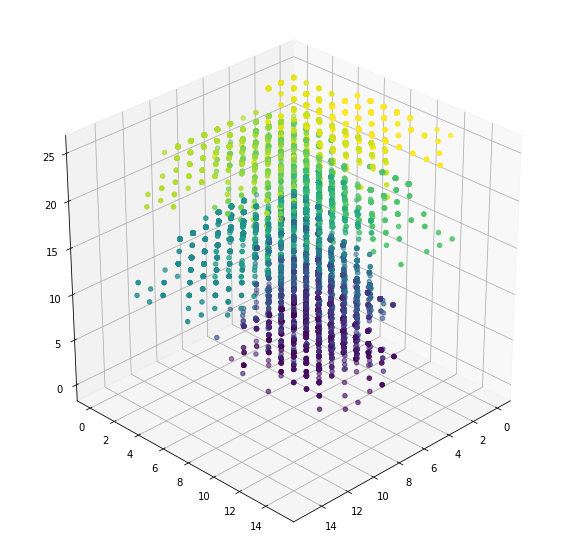

In [26]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

# Set up data for three-dimensional scattered points; use the 26 labels for color map
ax.scatter3D(xs=X["x-ege"], ys=X["y-ege"], zs=Y, c=Y)

# rotate the axes and update the view
ax.view_init(30, 45)
plt.draw()



The two features x-ege and y-ege are able to divide the target in distinct differentiable clusters as clearly shown in the 3D plot


**Summary**
In this exercise, the Letter recognition dataset was used. Below are the findings of the study:

1.   It was found that data contains no null values, hence very little pre processing was required on the dataset
2.   Data set is well represented for all target values
3.   Extra Tree Classifier(96.8%) and Random Forest Classifier (95.8%)have the best cross validation score followed by Voting Classifier (95.6%)
4.   x-ege is the most important feature for random tree classifier and other classifier models followed by y-ege. Rest of the feature importance differs accross models
5. The elbow and sihlouette plots indicate the optimal number of clusters for K-means is 2
6. The two features x-ege and y-ege are able to divide the target in distinct differentiable clusters as clearly shown in the 3D plot



